In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [11]:
# pivot table
df.pivot_table(index = 'job_title_short',values= 'salary_year_avg', aggfunc = 'median')

# size() fill count the number of rows in a df, count() will count the non na rows
# up till this point the pivot and groupby are functioning the same way
# but to show the median of salary_year_avg for particular country, only can be done using the pivot table

df.pivot_table(index = 'job_country',values= 'salary_year_avg',columns= 'job_title_short', aggfunc = 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [9]:
df.groupby('job_title_short')[['salary_year_avg']].median()

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [24]:
# calc the salary_year_avg for the top 6 countries among the top 3 jobs
top_country = df['job_country'].value_counts().head(6).index
top_jobs = df['job_title_short'].value_counts().head(3).index

#forming the pivot table
df_job_country_salary = df.pivot_table(
  values='salary_year_avg',
  index = 'job_country',
  columns='job_title_short',
  aggfunc='median'
               )

#filtering the pivot table
df_job_country_salary = df_job_country_salary.loc[top_country] #to access the rows
df_job_country_salary = df_job_country_salary[top_jobs] # to access the columns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

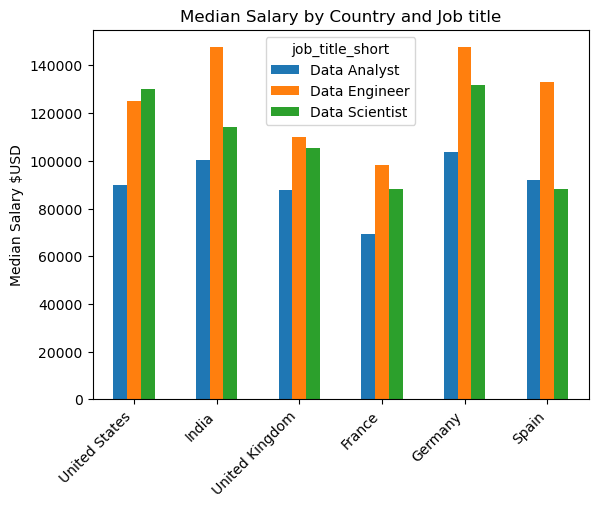

In [28]:
# ploting the graph
from turtle import right


df_job_country_salary.plot(kind='bar')
plt.title('Median Salary by Country and Job title')
plt.xlabel('')
plt.ylabel('Median Salary $USD')
plt.xticks(rotation = 45, ha = 'right')
